In [1]:
%matplotlib inline

# Recognizing hand-written digits

An example showing how the scikit-learn can be used to **recognize images of
hand-written digits**.

http://scikit-learn.org/stable/tutorial/basic/tutorial.html

In [2]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

Load the **digits** dataset that comes included with scikit-learn. The digits dataset includes a collection of 250 samples of handwritten numbers from 44 writers.

https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

In [3]:
# The digits dataset
digits = datasets.load_digits()

The dataset is a dictionary-like object that holds all the data and some metadata about the data. Applicable dataset fields include:
- **.target**: ground truth for the dataset
- **.data**: raw features
- **.images**: array of the features

In [4]:
# View the data array for "0"
print(digits.target[0])
print(digits.images[0])

0
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [5]:
# View the data array for "1"
print(digits.target[1])
print(digits.images[1])

1
[[  0.   0.   0.  12.  13.   5.   0.   0.]
 [  0.   0.   0.  11.  16.   9.   0.   0.]
 [  0.   0.   3.  15.  16.   6.   0.   0.]
 [  0.   7.  15.  16.  16.   2.   0.   0.]
 [  0.   0.   1.  16.  16.   3.   0.   0.]
 [  0.   0.   1.  16.  16.   6.   0.   0.]
 [  0.   0.   1.  16.  16.   6.   0.   0.]
 [  0.   0.   0.  11.  16.  10.   0.   0.]]


The data that we are interested in is made of 8x8 images of digits, let's have a look at the first 8 images, stored in the `images` attribute of the dataset.  If we were working from image files, we could load them using matplotlib.pyplot.imread.  Note that each image must have the same size. For these images, we know which digit they represent: it is given in the 'target' of the dataset.

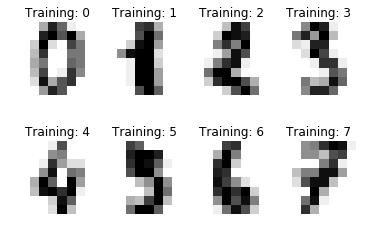

In [6]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

### Prepare the data

To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:

In [7]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Split the data in half to get a training set and test set. Only use part of the dataset so that we can evaluate the model's performance with the un-seen values (called test values).

In [8]:
train_values = data[:n_samples // 2]
train_labels = digits.target[:n_samples // 2]

test_values = data[n_samples // 2:]
test_labels = digits.target[n_samples // 2:]

### Establish the classifier

Use the support vector classifier from the support vector machine class

In [9]:
classifier = svm.SVC(gamma=0.001, C=1.0)

Train the model using only the first half of all available data value.

In [10]:
classifier.fit(train_values, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Evaluate the classifier

Now evaluate the model by predicting the value of the digit on the second half.

In [11]:
expected = test_labels
predicted = classifier.predict(test_values)

Print out the model's performance values, including a confusion matrix. The higher the precision percent, the better the model is at predicting the digits.

In [12]:
print("Classification report for classifier:\n%s\n"
      % (metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0

Print out some test predictions, so we can visualize how the model performs.

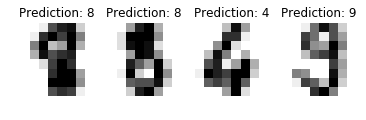

In [13]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()